In [7]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from alarmnetclass import AlarmNetNoCuda as AlarmNet  # Assuming this is the AlarmNet class from earlier
from federatedLearn import FederatedLearning
from torch import nn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
path = 'smoke_detection_iot.csv'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load and preprocess the data
data = pd.read_csv(path).drop(['Unnamed: 0', 'UTC', 'CNT'], axis=1)
Y_df = data['Fire Alarm']
X_df = data.drop('Fire Alarm', axis=1)

Y_test_raw = X_df.values
Y_raw = Y_df.values

# Split data into train and test
X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(Y_test_raw, Y_raw, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(X_train_raw)
X_test_raw = scaler.transform(X_test_raw)

# Convert to torch tensors
X_train = torch.tensor(X_train_raw, dtype=torch.float32)
X_test = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

Sequential(
  (0): Linear(in_features=12, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
  (7): Sigmoid()
)
--- Federated Training Round 1 ---
Sequential(
  (0): Linear(in_features=12, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
  (7): Sigmoid()
)
Client 1 - Epoch 100/600, Loss: 0.3893
Client 1 - Epoch 200/600, Loss: 0.1620
Client 1 - Epoch 300/600, Loss: 0.0964
Client 1 - Epoch 400/600, Loss: 0.0598
Client 1 - Epoch 500/600, Loss: 0.0394
Client 1 - Epoch 600/600, Loss: 0.0268
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.992548435171386, 'recall': 0.983129481

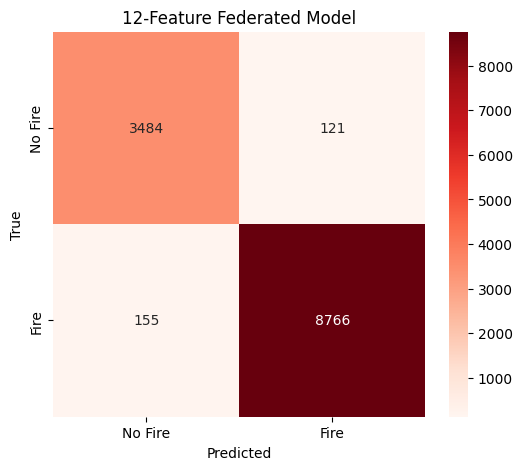


--- Client Reports ---
{'0.0': {'precision': 0.992548435171386, 'recall': 0.9831294812315479, 'f1-score': 0.9878165059858036, 'support': 4742.0}, '1.0': {'precision': 0.9933355548150616, 'recall': 0.9970733338907936, 'f1-score': 0.9952009347744439, 'support': 11959.0}, 'accuracy': 0.9931141847793545, 'macro avg': {'precision': 0.9929419949932239, 'recall': 0.9901014075611707, 'f1-score': 0.9915087203801238, 'support': 16701.0}, 'weighted avg': {'precision': 0.993112063925276, 'recall': 0.9931141847793545, 'f1-score': 0.9931042362943688, 'support': 16701.0}}
{'0.0': {'precision': 0.9798239965657867, 'recall': 0.9762617621899059, 'f1-score': 0.9780396357793251, 'support': 4676.0}, '1.0': {'precision': 0.9907822620827105, 'recall': 0.9921829521829522, 'f1-score': 0.9914821124361158, 'support': 12025.0}, 'accuracy': 0.9877252859110233, 'macro avg': {'precision': 0.9853031293242486, 'recall': 0.984222357186429, 'f1-score': 0.9847608741077205, 'support': 16701.0}, 'weighted avg': {'precisio

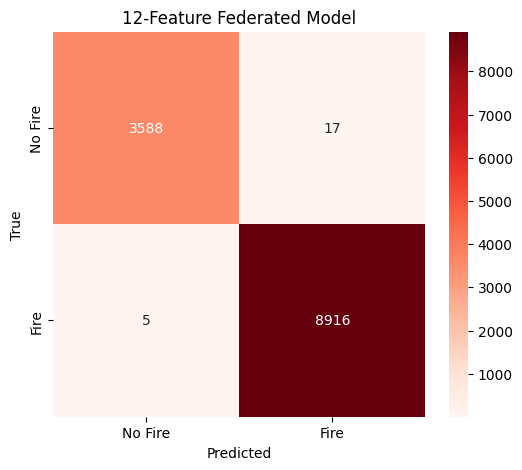


--- Client Reports ---
{'0.0': {'precision': 0.9991541552125185, 'recall': 0.9964150147617039, 'f1-score': 0.9977827050997783, 'support': 4742.0}, '1.0': {'precision': 0.9985800200467758, 'recall': 0.9996655238732336, 'f1-score': 0.999122477121725, 'support': 11959.0}, 'accuracy': 0.9987425902640561, 'macro avg': {'precision': 0.9988670876296472, 'recall': 0.9980402693174688, 'f1-score': 0.9984525911107516, 'support': 16701.0}, 'weighted avg': {'precision': 0.9987430371688615, 'recall': 0.9987425902640561, 'f1-score': 0.9987420688271275, 'support': 16701.0}}
{'0.0': {'precision': 0.9991408934707904, 'recall': 0.9948674080410608, 'f1-score': 0.9969995713673382, 'support': 4676.0}, '1.0': {'precision': 0.9980074719800747, 'recall': 0.9996673596673596, 'f1-score': 0.9988367262152057, 'support': 12025.0}, 'accuracy': 0.9983234536854081, 'macro avg': {'precision': 0.9985741827254325, 'recall': 0.9972673838542102, 'f1-score': 0.9979181487912719, 'support': 16701.0}, 'weighted avg': {'precis

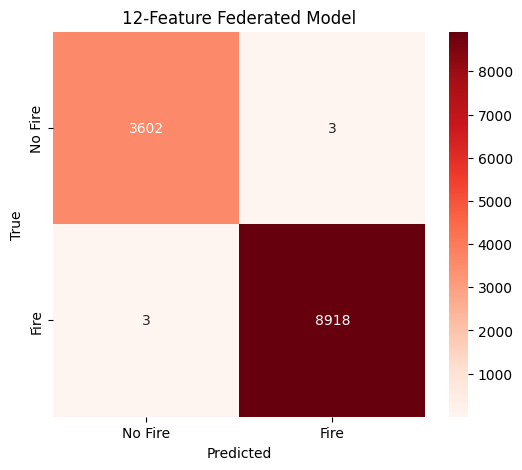


--- Client Reports ---
{'0.0': {'precision': 0.9997889404812157, 'recall': 0.9989455925769718, 'f1-score': 0.9993670886075949, 'support': 4742.0}, '1.0': {'precision': 0.9995820446376327, 'recall': 0.9999163809683084, 'f1-score': 0.999749184850765, 'support': 11959.0}, 'accuracy': 0.9996407400754446, 'macro avg': {'precision': 0.9996854925594242, 'recall': 0.9994309867726401, 'f1-score': 0.9995581367291799, 'support': 16701.0}, 'weighted avg': {'precision': 0.9996407896283681, 'recall': 0.9996407400754446, 'f1-score': 0.9996406943181555, 'support': 16701.0}}
{'0.0': {'precision': 0.9995720094157928, 'recall': 0.9989307100085543, 'f1-score': 0.9992512568189111, 'support': 4676.0}, '1.0': {'precision': 0.999584303292318, 'recall': 0.9998336798336799, 'f1-score': 0.9997089760113084, 'support': 12025.0}, 'accuracy': 0.999580863421352, 'macro avg': {'precision': 0.9995781563540553, 'recall': 0.999382194921117, 'f1-score': 0.9994801164151097, 'support': 16701.0}, 'weighted avg': {'precision

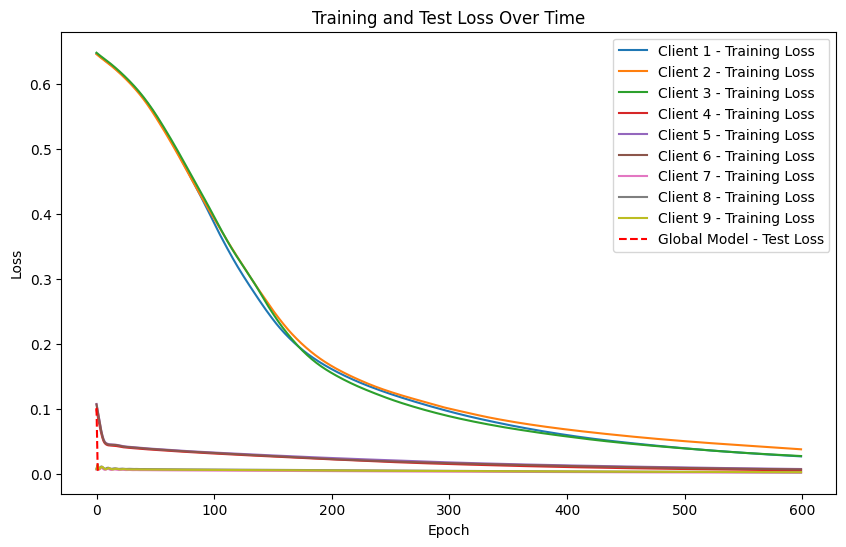

Accuracy: 0.9995209963276385
Precision: 0.999663714830176
Recall: 0.999663714830176
F1: 0.999663714830176
Confusion_matrix:
[[3602    3]
 [   3 8918]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3602    3]
 [   3 8918]]


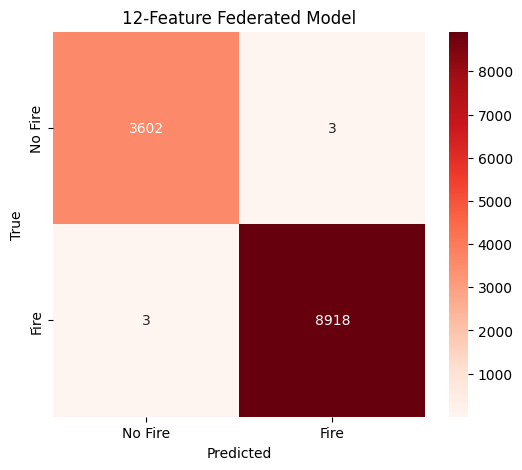

In [9]:
full_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

full_federated_system = FederatedLearning(full_global_model, n_clients=3)

#federated_system.dump_data_to_csv(X_train, Y_train, output_dir='client_data')

full_federated_system.split_data(X_train, Y_train)
full_federated_system.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test,Y_test=Y_test, conf_title = "12-Feature Federated Model")

full_federated_system.evaluate_global_model(X_test, Y_test, conf_title = "12-Feature Federated Model")

In [10]:
corr = np.abs(data.corr())
ranking = corr['Fire Alarm'].sort_values(ascending=False)[1:]
print(ranking)

num_drops = 8
remaining_features = ranking.index[:-num_drops]


X_df_dropped = data[remaining_features]
print('Remaining features:', X_df_dropped.columns)
X_train_dropped, X_test_dropped, Y_train_dropped, Y_test_dropped = train_test_split(X_df_dropped.values, Y_raw, test_size=0.2, random_state=0)

X_train_dropped = scaler.fit_transform(X_train_dropped)
X_test_dropped = scaler.transform(X_test_dropped)

Humidity[%]       0.399846
Raw Ethanol       0.340652
Pressure[hPa]     0.249797
TVOC[ppb]         0.214743
Temperature[C]    0.163902
NC0.5             0.128118
PM1.0             0.110552
Raw H2            0.107007
eCO2[ppm]         0.097006
PM2.5             0.084916
NC1.0             0.082828
NC2.5             0.057707
Name: Fire Alarm, dtype: float64
Remaining features: Index(['Humidity[%]', 'Raw Ethanol', 'Pressure[hPa]', 'TVOC[ppb]'], dtype='object')


--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.4537
Client 1 - Epoch 200/600, Loss: 0.1562
Client 1 - Epoch 300/600, Loss: 0.1014
Client 1 - Epoch 400/600, Loss: 0.0777
Client 1 - Epoch 500/600, Loss: 0.0614
Client 1 - Epoch 600/600, Loss: 0.0467
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9657058699768567, 'recall': 0.967946014339941, 'f1-score': 0.966824644549763, 'support': 4742.0}, '1.0': {'precision': 0.9872782055574155, 'recall': 0.9863700978342671, 'f1-score': 0.9868239427782658, 'support': 11959.0}, 'accuracy': 0.9811388539608407, 'macro avg': {'precision': 0.9764920377671361, 'recall': 0.977158056087104, 'f1-score': 0.9768242936640144, 'support': 16701.0}, 'weighted avg': {'precision': 0.9811530624328715, 'recall': 0.9811388539608407, 'f1-score': 0.9811454401616824, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4590   152]
 [  163 11796]]
Client 2 - Epoch 100/600, Loss: 0.4540
Client 2 - Epoch 200/600,

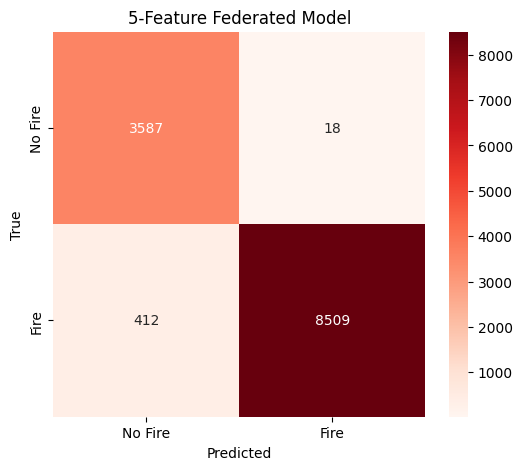


--- Client Reports ---
{'0.0': {'precision': 0.9657058699768567, 'recall': 0.967946014339941, 'f1-score': 0.966824644549763, 'support': 4742.0}, '1.0': {'precision': 0.9872782055574155, 'recall': 0.9863700978342671, 'f1-score': 0.9868239427782658, 'support': 11959.0}, 'accuracy': 0.9811388539608407, 'macro avg': {'precision': 0.9764920377671361, 'recall': 0.977158056087104, 'f1-score': 0.9768242936640144, 'support': 16701.0}, 'weighted avg': {'precision': 0.9811530624328715, 'recall': 0.9811388539608407, 'f1-score': 0.9811454401616824, 'support': 16701.0}}
{'0.0': {'precision': 0.9701619778346121, 'recall': 0.9734816082121471, 'f1-score': 0.9718189581554227, 'support': 4676.0}, '1.0': {'precision': 0.9896744108585228, 'recall': 0.9883575883575884, 'f1-score': 0.9890155612881751, 'support': 12025.0}, 'accuracy': 0.9841925633195617, 'macro avg': {'precision': 0.9799181943465675, 'recall': 0.9809195982848677, 'f1-score': 0.9804172597217989, 'support': 16701.0}, 'weighted avg': {'precisio

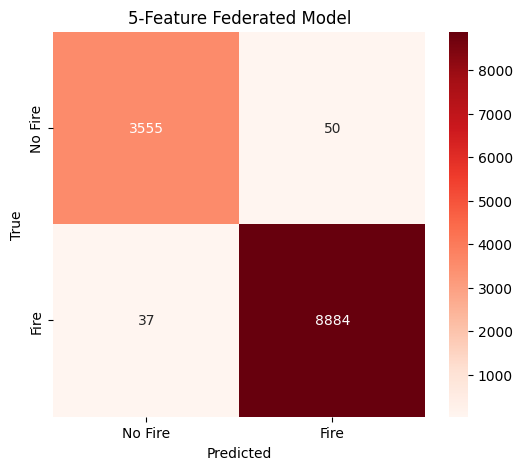


--- Client Reports ---
{'0.0': {'precision': 0.9927874416631312, 'recall': 0.9869253479544496, 'f1-score': 0.9898477157360406, 'support': 4742.0}, '1.0': {'precision': 0.9948277300408777, 'recall': 0.9971569529224852, 'f1-score': 0.9959909797043347, 'support': 11959.0}, 'accuracy': 0.9942518412071133, 'macro avg': {'precision': 0.9938075858520043, 'recall': 0.9920411504384674, 'f1-score': 0.9929193477201876, 'support': 16701.0}, 'weighted avg': {'precision': 0.9942484205691531, 'recall': 0.9942518412071133, 'f1-score': 0.9942466914738305, 'support': 16701.0}}
{'0.0': {'precision': 0.991833225875779, 'recall': 0.9869546621043627, 'f1-score': 0.9893879301104084, 'support': 4676.0}, '1.0': {'precision': 0.9949369189907038, 'recall': 0.9968399168399168, 'f1-score': 0.9958875088273169, 'support': 12025.0}, 'accuracy': 0.9940722112448357, 'macro avg': {'precision': 0.9933850724332414, 'recall': 0.9918972894721397, 'f1-score': 0.9926377194688627, 'support': 16701.0}, 'weighted avg': {'precis

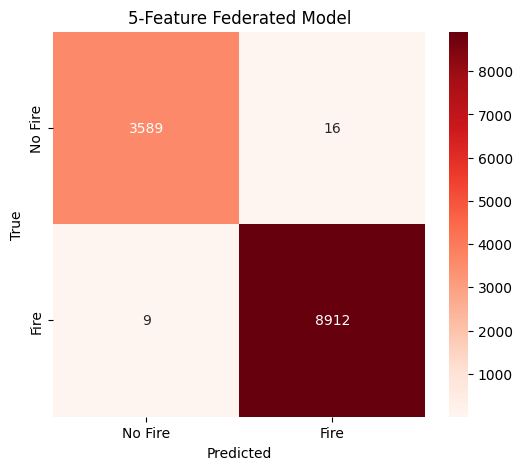


--- Client Reports ---
{'0.0': {'precision': 0.9978885135135135, 'recall': 0.9966258962463096, 'f1-score': 0.9972568052331715, 'support': 4742.0}, '1.0': {'precision': 0.9986627664020058, 'recall': 0.9991638096830838, 'f1-score': 0.998913225213175, 'support': 11959.0}, 'accuracy': 0.9984432069935932, 'macro avg': {'precision': 0.9982756399577597, 'recall': 0.9978948529646967, 'f1-score': 0.9980850152231733, 'support': 16701.0}, 'weighted avg': {'precision': 0.9984429288355589, 'recall': 0.9984432069935932, 'f1-score': 0.9984429094509345, 'support': 16701.0}}
{'0.0': {'precision': 0.9982876712328768, 'recall': 0.9974337040205303, 'f1-score': 0.9978605049208387, 'support': 4676.0}, '1.0': {'precision': 0.9990024108404688, 'recall': 0.9993347193347193, 'f1-score': 0.9991685374573875, 'support': 12025.0}, 'accuracy': 0.9988024669181487, 'macro avg': {'precision': 0.9986450410366727, 'recall': 0.9983842116776248, 'f1-score': 0.9985145211891131, 'support': 16701.0}, 'weighted avg': {'precis

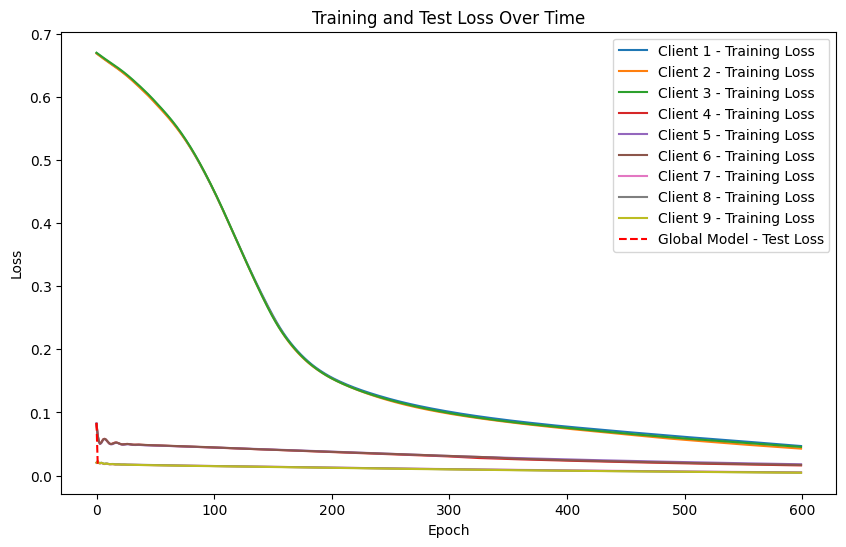

Accuracy: 0.9980041513651605
Precision: 0.9982078853046595
Recall: 0.998991144490528
F1: 0.9985993613087568
Confusion_matrix:
[[3589   16]
 [   9 8912]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3589   16]
 [   9 8912]]


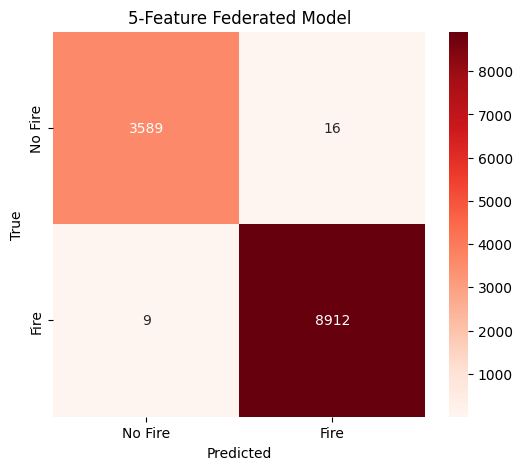

In [11]:
# Convert to torch tensors
X_train_dropped_device = torch.tensor(X_train_raw, dtype=torch.float32)
X_test_dropped_device = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train_dropped_device = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test_dropped_device = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

dropped_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

dropped5f_federated = FederatedLearning(dropped_global_model, n_clients=3)

dropped5f_federated.split_data(X_train_dropped_device, Y_train_dropped_device)
dropped5f_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test_dropped_device,Y_test=Y_test_dropped_device, conf_title="5-Feature Federated Model")

dropped5f_federated.evaluate_global_model(X_test_dropped_device, Y_test_dropped_device, conf_title="5-Feature Federated Model")

In [12]:
AlarmNet.compare_results(dropped_global_model.get_results(), full_global_model.get_results())

Comparing results:
accuracy: -0.15198784097271237 %
precision: -0.14584432230488287 %
recall: -0.06732495511670153 %
f1: -0.10658463871079085 %


In [13]:
import random
from sklearn.impute import SimpleImputer

--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.4341
Client 1 - Epoch 200/600, Loss: 0.1489
Client 1 - Epoch 300/600, Loss: 0.0897
Client 1 - Epoch 400/600, Loss: 0.0673
Client 1 - Epoch 500/600, Loss: 0.0512
Client 1 - Epoch 600/600, Loss: 0.0362
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9859094790777113, 'recall': 0.9738506959088992, 'f1-score': 0.9798429874814343, 'support': 4742.0}, '1.0': {'precision': 0.9896812848464676, 'recall': 0.9944811439083535, 'f1-score': 0.9920754087420754, 'support': 11959.0}, 'accuracy': 0.9886234357224118, 'macro avg': {'precision': 0.9877953819620895, 'recall': 0.9841659199086263, 'f1-score': 0.9859591981117548, 'support': 16701.0}, 'weighted avg': {'precision': 0.9886103368220714, 'recall': 0.9886234357224118, 'f1-score': 0.9886021950651721, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4618   124]
 [   66 11893]]
Client 2 - Epoch 100/600, Loss: 0.4322
Client 2 - Epoch 200/6

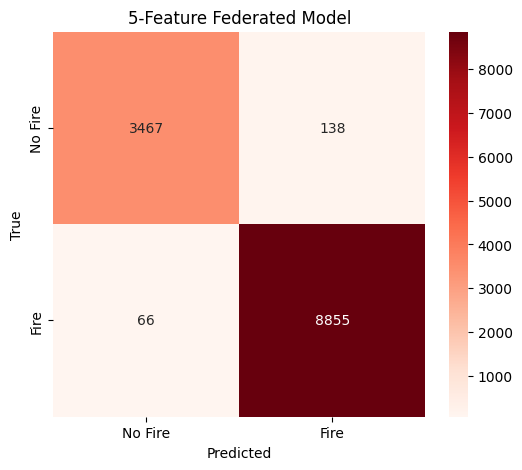


--- Client Reports ---
{'0.0': {'precision': 0.9859094790777113, 'recall': 0.9738506959088992, 'f1-score': 0.9798429874814343, 'support': 4742.0}, '1.0': {'precision': 0.9896812848464676, 'recall': 0.9944811439083535, 'f1-score': 0.9920754087420754, 'support': 11959.0}, 'accuracy': 0.9886234357224118, 'macro avg': {'precision': 0.9877953819620895, 'recall': 0.9841659199086263, 'f1-score': 0.9859591981117548, 'support': 16701.0}, 'weighted avg': {'precision': 0.9886103368220714, 'recall': 0.9886234357224118, 'f1-score': 0.9886021950651721, 'support': 16701.0}}
{'0.0': {'precision': 0.9870382372002592, 'recall': 0.9771171941830624, 'f1-score': 0.9820526598602901, 'support': 4676.0}, '1.0': {'precision': 0.9911365142478462, 'recall': 0.995010395010395, 'f1-score': 0.9930696767232435, 'support': 12025.0}, 'accuracy': 0.9900005987665409, 'macro avg': {'precision': 0.9890873757240527, 'recall': 0.9860637945967288, 'f1-score': 0.9875611682917669, 'support': 16701.0}, 'weighted avg': {'precis

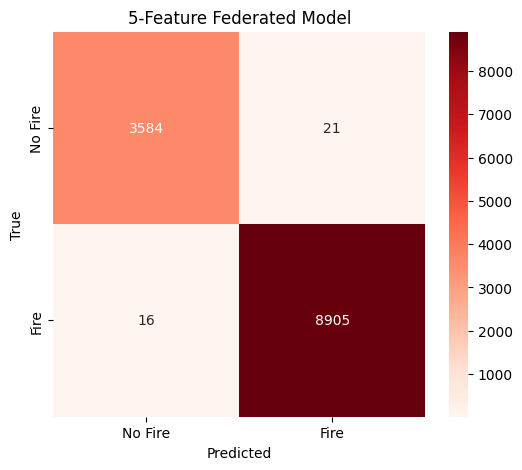


--- Client Reports ---
{'0.0': {'precision': 0.9995777918513827, 'recall': 0.9985238296077604, 'f1-score': 0.9990505327566199, 'support': 4742.0}, '1.0': {'precision': 0.9994149114008692, 'recall': 0.9998327619366167, 'f1-score': 0.9996237930025499, 'support': 11959.0}, 'accuracy': 0.9994611101131669, 'macro avg': {'precision': 0.9994963516261259, 'recall': 0.9991782957721886, 'f1-score': 0.9993371628795849, 'support': 16701.0}, 'weighted avg': {'precision': 0.9994611588768487, 'recall': 0.9994611101131669, 'f1-score': 0.9994610243009031, 'support': 16701.0}}
{'0.0': {'precision': 0.9995718261614215, 'recall': 0.9985029940119761, 'f1-score': 0.9990371242109768, 'support': 4676.0}, '1.0': {'precision': 0.9994181213632585, 'recall': 0.9998336798336799, 'f1-score': 0.9996258574101019, 'support': 12025.0}, 'accuracy': 0.9994611101131669, 'macro avg': {'precision': 0.99949497376234, 'recall': 0.9991683369228279, 'f1-score': 0.9993314908105393, 'support': 16701.0}, 'weighted avg': {'precisi

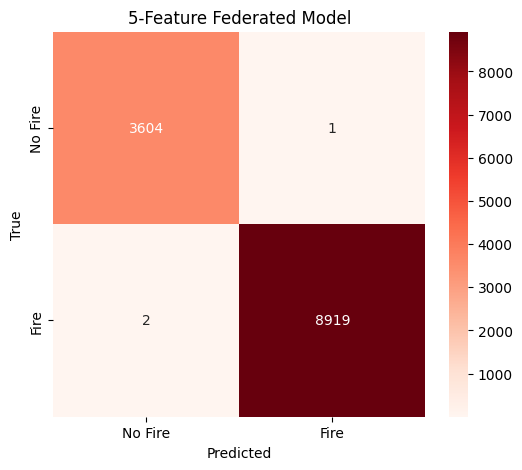


--- Client Reports ---
{'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4742.0}, '1.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11959.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16701.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16701.0}}
{'0.0': {'precision': 0.9995724668661822, 'recall': 1.0, 'f1-score': 0.9997861877271755, 'support': 4676.0}, '1.0': {'precision': 1.0, 'recall': 0.9998336798336799, 'f1-score': 0.9999168330006654, 'support': 12025.0}, 'accuracy': 0.9998802466918149, 'macro avg': {'precision': 0.9997862334330911, 'recall': 0.9999168399168399, 'f1-score': 0.9998515103639205, 'support': 16701.0}, 'weighted avg': {'precision': 0.999880297890322, 'recall': 0.9998802466918149, 'f1-score': 0.9998802545144169, 'support': 16701.0}}
{'0.0': {'precision': 0.9997938569367141, 'recall': 1.0, 'f1-score': 0.9998969178435213, 'support': 4850.0}, '1.0': 

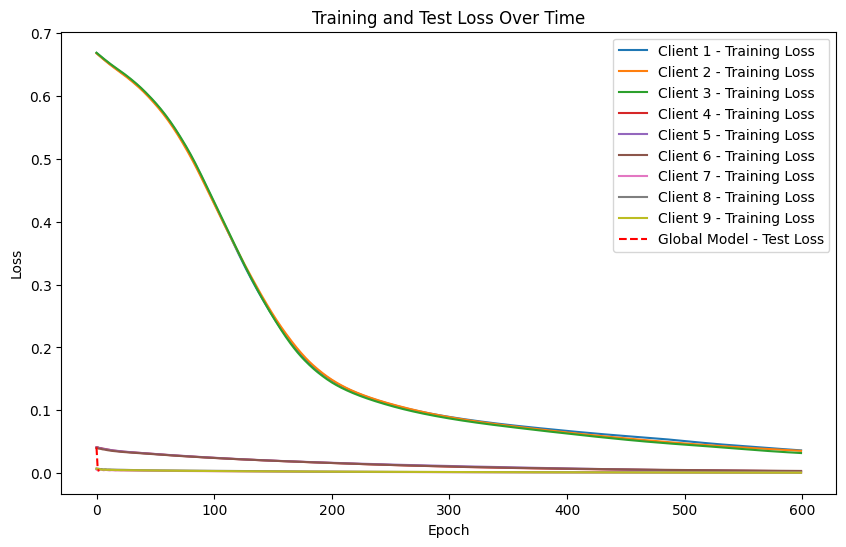

Accuracy: 0.9997604981638193
Precision: 0.9998878923766816
Recall: 0.9997758098867839
F1: 0.9998318479905834
Confusion_matrix:
[[3604    1]
 [   2 8919]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3604    1]
 [   2 8919]]


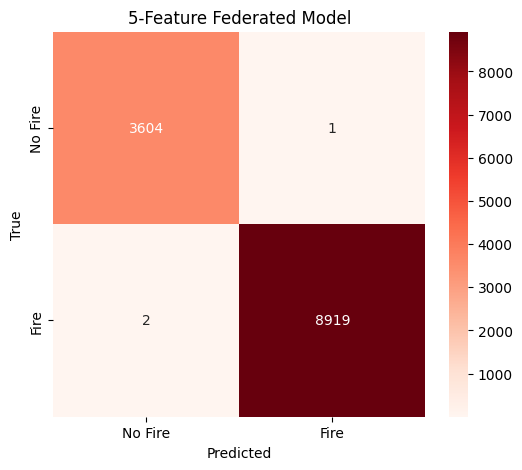

In [14]:
remaining_features_2 = list(remaining_features)
remaining_features_2.append(ranking.index[5])
X_5f = data[remaining_features_2]
X_train_5f, X_test_5f, Y_train_5f, Y_test_5f = train_test_split(X_5f.values, Y_raw, test_size=0.2, random_state=0)

# Introduce sensor errors

VOC_features = [
    'TVOC[ppb]',
    'eCO2[ppm]',
    'Raw H2',
    'Raw Ethanol'
]

PM_features = [
    'PM1.0',
    'PM2.5',
    'NC0.5',
    'NC1.0',
    'NC2.5'
]

th_features = [
    'Temperature[C]',
    'Humidity[%]'
]
pressure_features = [
    'Pressure[hPa]'
]

# For each measurement, each sensor has this chance of introducing an error
error_chance = 0.2

# The PM sensor is twice as likely to fail due to lack of redundancy
chances = [error_chance, error_chance*2, error_chance, error_chance]
sensors = [VOC_features, PM_features, th_features, pressure_features]

error_mask = np.ones(X_5f.shape)

X_error_np = X_5f.values.copy()
for i, datapoint in enumerate(X_5f.values):
    errored_features = []
    for j, sensor in enumerate(sensors):
        sensor_error = random.random() < chances[j]
        if sensor_error:
            errored_features.extend(sensor)
    errored_features = [feature for feature in errored_features if feature in X_5f.columns]
    if errored_features:
        for feature in errored_features:
            X_error_np[i][X_5f.columns.get_loc(feature)] = np.nan
        # print(i, X_error_np[i])

scaler = StandardScaler()
X_train_5f = scaler.fit_transform(X_train_5f)
X_test_5f = scaler.transform(X_test_5f)

X_train_5f_device = torch.tensor(X_train_raw, dtype=torch.float32)
X_test_5f_device = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train_5f_device = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test_5f_device = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

dropped5f_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

dropped5f_federated = FederatedLearning(dropped5f_global_model, n_clients=3)

dropped5f_federated.split_data(X_train_5f_device, Y_train_5f_device)
dropped5f_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test_5f_device,Y_test=Y_test_5f_device, conf_title="5-Feature Federated Model")

dropped5f_federated.evaluate_global_model(X_test_5f_device, Y_test_5f_device, "5-Feature Federated Model")

In [15]:
AlarmNet.compare_results(dropped5f_global_model.get_results(), full_global_model.get_results())

Comparing results:
accuracy: 0.0239559211051743 %
precision: 0.022420268133535672 %
recall: 0.01121201928466474 %
f1: 0.016816143709097755 %


--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.4548
Client 1 - Epoch 200/600, Loss: 0.2970
Client 1 - Epoch 300/600, Loss: 0.2143
Client 1 - Epoch 400/600, Loss: 0.1834
Client 1 - Epoch 500/600, Loss: 0.1652
Client 1 - Epoch 600/600, Loss: 0.1503
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9397590361445783, 'recall': 0.8388865457612822, 'f1-score': 0.8864623955431755, 'support': 4742.0}, '1.0': {'precision': 0.9387231312159128, 'recall': 0.9786771469186387, 'f1-score': 0.958283866213616, 'support': 11959.0}, 'accuracy': 0.9389856894796719, 'macro avg': {'precision': 0.9392410836802456, 'recall': 0.9087818463399604, 'f1-score': 0.9223731308783958, 'support': 16701.0}, 'weighted avg': {'precision': 0.9390172609789049, 'recall': 0.9389856894796719, 'f1-score': 0.9378912302086325, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 3978   764]
 [  255 11704]]
Client 2 - Epoch 100/600, Loss: 0.4507
Client 2 - Epoch 200/60

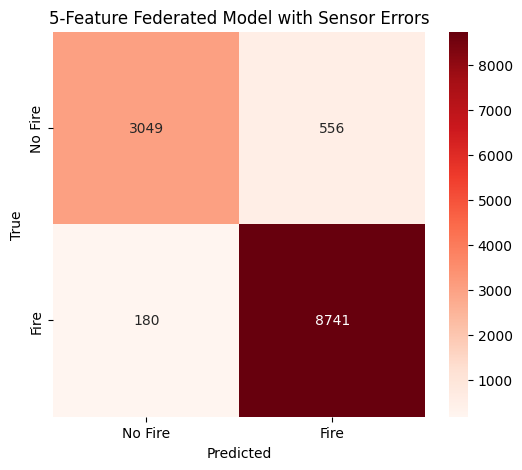


--- Client Reports ---
{'0.0': {'precision': 0.9397590361445783, 'recall': 0.8388865457612822, 'f1-score': 0.8864623955431755, 'support': 4742.0}, '1.0': {'precision': 0.9387231312159128, 'recall': 0.9786771469186387, 'f1-score': 0.958283866213616, 'support': 11959.0}, 'accuracy': 0.9389856894796719, 'macro avg': {'precision': 0.9392410836802456, 'recall': 0.9087818463399604, 'f1-score': 0.9223731308783958, 'support': 16701.0}, 'weighted avg': {'precision': 0.9390172609789049, 'recall': 0.9389856894796719, 'f1-score': 0.9378912302086325, 'support': 16701.0}}
{'0.0': {'precision': 0.938960419647115, 'recall': 0.8421727972626176, 'f1-score': 0.8879368658399098, 'support': 4676.0}, '1.0': {'precision': 0.9409930438954186, 'recall': 0.9787110187110187, 'f1-score': 0.9594814935594326, 'support': 12025.0}, 'accuracy': 0.9404826058319861, 'macro avg': {'precision': 0.9399767317712668, 'recall': 0.9104419079868182, 'f1-score': 0.9237091796996713, 'support': 16701.0}, 'weighted avg': {'precisi

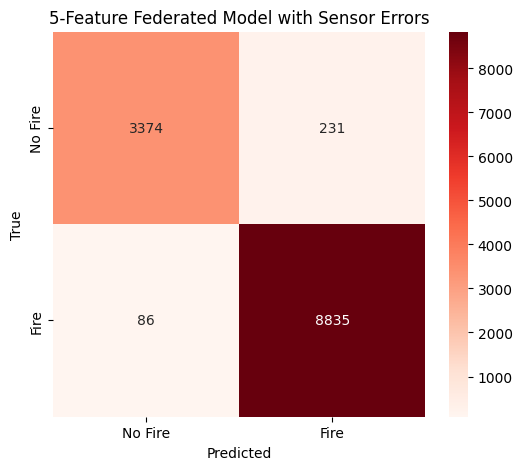


--- Client Reports ---
{'0.0': {'precision': 0.9794183445190157, 'recall': 0.9232391396035428, 'f1-score': 0.9504993486756405, 'support': 4742.0}, '1.0': {'precision': 0.9702395552285177, 'recall': 0.9923070490843716, 'f1-score': 0.9811492352211658, 'support': 11959.0}, 'accuracy': 0.9726962457337884, 'macro avg': {'precision': 0.9748289498737667, 'recall': 0.9577730943439572, 'f1-score': 0.9658242919484031, 'support': 16701.0}, 'weighted avg': {'precision': 0.9728457356258318, 'recall': 0.9726962457337884, 'f1-score': 0.9724466568127543, 'support': 16701.0}}
{'0.0': {'precision': 0.9782608695652174, 'recall': 0.9238665526090676, 'f1-score': 0.9502859656841179, 'support': 4676.0}, '1.0': {'precision': 0.971021571021571, 'recall': 0.992016632016632, 'f1-score': 0.981406828465652, 'support': 12025.0}, 'accuracy': 0.9729357523501587, 'macro avg': {'precision': 0.9746412202933943, 'recall': 0.9579415923128498, 'f1-score': 0.965846397074885, 'support': 16701.0}, 'weighted avg': {'precision

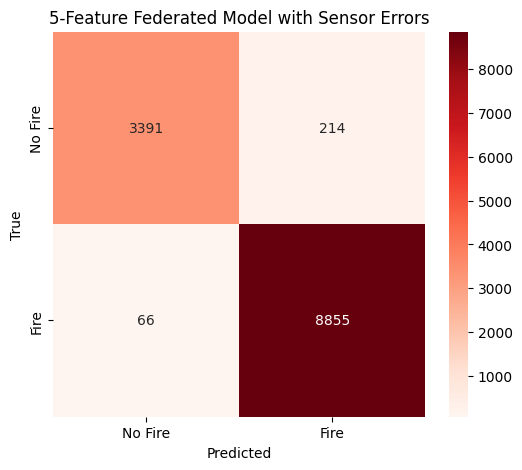


--- Client Reports ---
{'0.0': {'precision': 0.9821899736147758, 'recall': 0.9420075917334458, 'f1-score': 0.9616792249730893, 'support': 4742.0}, '1.0': {'precision': 0.9773718423434543, 'recall': 0.9932268584329793, 'f1-score': 0.9852355673523556, 'support': 11959.0}, 'accuracy': 0.9786839111430453, 'macro avg': {'precision': 0.9797809079791151, 'recall': 0.9676172250832126, 'f1-score': 0.9734573961627224, 'support': 16701.0}, 'weighted avg': {'precision': 0.9787398788974694, 'recall': 0.9786839111430453, 'f1-score': 0.9785470950715053, 'support': 16701.0}}
{'0.0': {'precision': 0.980543886800796, 'recall': 0.9484602224123182, 'f1-score': 0.9642352429611915, 'support': 4676.0}, '1.0': {'precision': 0.9802102151420594, 'recall': 0.9926819126819126, 'f1-score': 0.9864066438044871, 'support': 12025.0}, 'accuracy': 0.9803005808035447, 'macro avg': {'precision': 0.9803770509714277, 'recall': 0.9705710675471154, 'f1-score': 0.9753209433828393, 'support': 16701.0}, 'weighted avg': {'precis

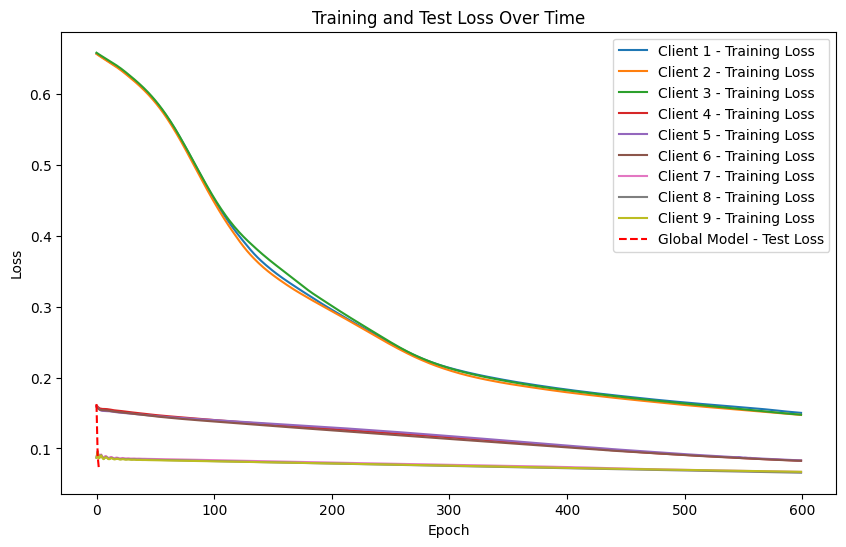

Accuracy: 0.9776464952897972
Precision: 0.9764031315470283
Recall: 0.9926017262638718
F1: 0.9844357976653697
Confusion_matrix:
[[3391  214]
 [  66 8855]]
Classification_report:               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      3605
         1.0       0.98      0.99      0.98      8921

    accuracy                           0.98     12526
   macro avg       0.98      0.97      0.97     12526
weighted avg       0.98      0.98      0.98     12526

Confusion Matrix for Global Model:
[[3391  214]
 [  66 8855]]


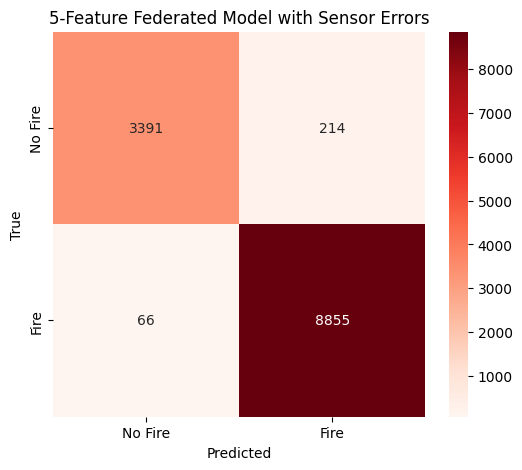

In [16]:
from sklearn.impute import SimpleImputer
X_error_train, X_error_test, Y_error_train, Y_error_test = train_test_split(X_error_np, Y_raw, test_size=0.2, random_state=0)

imputer = SimpleImputer(strategy='median')
#imputer.fit(X_5f.values)
imputer.fit(X_error_train)
X_impute_train = imputer.transform(X_error_train)
X_impute_test = imputer.transform(X_error_test)
scaler = StandardScaler()
X_impute_train = scaler.fit_transform(X_impute_train)
X_impute_test = scaler.transform(X_impute_test)

X_error_train_device = torch.tensor(X_impute_train, dtype=torch.float32)
X_error_test_device = torch.tensor(X_impute_test, dtype=torch.float32)
Y_error_train_device = torch.tensor(Y_error_train, dtype=torch.float32).reshape(-1, 1)
Y_error_test_device = torch.tensor(Y_error_test, dtype=torch.float32).reshape(-1, 1)

global_error_model = AlarmNet(num_features=X_error_train.shape[1], hidden_layers=[32, 16, 8])

error_federated = FederatedLearning(global_error_model, n_clients=3)
error_federated.split_data(X_error_train_device, Y_error_train_device)
error_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_error_test_device,Y_test=Y_error_test_device, conf_title="5-Feature Federated Model with Sensor Errors")
error_federated.evaluate_global_model(X_error_test_device, Y_error_test_device, "5-Feature Federated Model with Sensor Errors")

In [17]:
AlarmNet.compare_results(global_error_model.get_results(), dropped5f_global_model.get_results())

Comparing results:
accuracy: -2.2619630899885745 %
precision: -2.405232026698206 %
recall: -0.7227555053641944 %
f1: -1.5639466140632137 %
